<a href="https://colab.research.google.com/github/maviayten/veri_goresellestirme/blob/main/Veri_G%C3%B6rselle%C5%9Ftirme_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_samples = 1000

def eksik_deger_ekle(data, yuzde=10):
    data_series = pd.Series(data)
    num_samples = len(data_series)
    eksik_indices = np.random.choice(num_samples, int(yuzde/100*num_samples), replace=False)
    data_series.iloc[eksik_indices] = np.nan
    return data_series.values

alan = np.random.randint(50, 500, num_samples)
alan = eksik_deger_ekle(alan, yuzde=10)
alan_aykiri_indices = np.random.choice(num_samples, 30, replace=False)
alan[alan_aykiri_indices] = np.random.randint(6000, 10000, 30)

oda_sayısı = np.random.randint(1, 7, num_samples)
oda_sayısı = eksik_deger_ekle(oda_sayısı, yuzde=8)
oda_sayisi_aykiri_indices = np.random.choice(num_samples, 30, replace=False)
oda_sayısı[oda_sayisi_aykiri_indices] = np.random.randint(20, 30, 30)

banyo_sayısı = np.random.randint(1, 5, num_samples).astype(float)
banyo_sayısı = eksik_deger_ekle(banyo_sayısı, yuzde=10)
banyo_sayisi_aykiri_indices = np.random.choice(num_samples, 30, replace=False)
banyo_sayısı[banyo_sayisi_aykiri_indices] = np.random.randint(10, 20, 30)

yapım_yılı = np.random.randint(1950, 2023, num_samples)
yapım_yılı = eksik_deger_ekle(yapım_yılı, yuzde=10)
yapim_yili_aykiri_indices = np.random.choice(num_samples, 30, replace=False)
yapım_yılı[yapim_yili_aykiri_indices] = np.random.randint(1500, 1600, 30)

fiyat = alan * 300 + oda_sayısı * 5000 + banyo_sayısı * 3000
fiyat = fiyat + np.random.normal(0, 20000, num_samples)
fiyat = eksik_deger_ekle(fiyat, yuzde=10)
fiyat_aykiri_indices = np.random.choice(num_samples, 30, replace=False)
fiyat[fiyat_aykiri_indices] = fiyat[fiyat_aykiri_indices] + np.random.randint(2e7, 3e7, 30)

garaj = np.random.choice(['Evet', 'Hayır'], num_samples)
garaj = eksik_deger_ekle(garaj, yuzde=10)

konum = np.random.choice(['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Antalya'], num_samples)
konum = eksik_deger_ekle(konum, yuzde=10)

ısıtma_türü = np.random.choice(['Doğalgaz', 'Elektrikli', 'Kömürlü'], num_samples)
ısıtma_türü = eksik_deger_ekle(ısıtma_türü, yuzde=5)

ev_data = pd.DataFrame({
    'Alan': alan,
    'Oda_Sayısı': oda_sayısı,
    'Banyo_Sayısı': banyo_sayısı,
    'Yapım_Yılı': yapım_yılı,
    'Garaj': garaj,
    'Konum': konum,
    'Fiyat': fiyat,
    'Isıtma_Türü': ısıtma_türü
})

ev_data


,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Garaj,Konum,Fiyat,Isıtma_Türü
0,152.0,6.0,4.0,2015.0,Evet,Ankara,108907.525445,Doğalgaz
1,485.0,2.0,2.0,1995.0,Evet,Bursa,156339.089688,Doğalgaz
2,398.0,1.0,1.0,1979.0,Hayır,İstanbul,152771.664713,Doğalgaz
3,320.0,5.0,2.0,2018.0,Hayır,İzmir,136828.255127,Doğalgaz
4,156.0,6.0,4.0,NaN,Hayır,Antalya,NaN,Doğalgaz
...,...,...,...,...,...,...,...,...
995,79.0,6.0,1.0,NaN,Evet,Bursa,53107.605572,Doğalgaz
996,296.0,1.0,2.0,2020.0,NaN,NaN,134313.875856,Kömürlü
997,155.0,4.0,3.0,1975.0,NaN,Bursa,NaN,Doğalgaz
998,100.0,5.0,4.0,2005.0,Hayır,İstanbul,82068.349468,Elektrikli


In [2]:
ev_data.head()

,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Garaj,Konum,Fiyat,Isıtma_Türü
0,152.0,6.0,4.0,2015.0,Evet,Ankara,108907.525445,Doğalgaz
1,485.0,2.0,2.0,1995.0,Evet,Bursa,156339.089688,Doğalgaz
2,398.0,1.0,1.0,1979.0,Hayır,İstanbul,152771.664713,Doğalgaz
3,320.0,5.0,2.0,2018.0,Hayır,İzmir,136828.255127,Doğalgaz
4,156.0,6.0,4.0,NaN,Hayır,Antalya,NaN,Doğalgaz


In [3]:
ev_data.describe()

,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Fiyat
count,903.000000,921.000000,902.000000,903.000000,6.680000e+02
mean,525.437431,4.195440,2.905765,1971.531561,9.218486e+05
std,1368.021756,4.141101,2.541769,80.922692,4.235306e+06
min,50.000000,1.000000,1.000000,1502.000000,-8.706056e+03
25%,173.500000,2.000000,2.000000,1966.500000,7.961537e+04
50%,279.000000,4.000000,3.000000,1984.000000,1.195224e+05
75%,398.000000,5.000000,4.000000,2004.000000,1.555807e+05
max,9919.000000,29.000000,19.000000,2022.000000,3.004170e+07


In [4]:
numeric_features = ev_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_features.corr()

print(correlation_matrix)

                  Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı     Fiyat
Alan          1.000000   -0.027665      0.083398   -0.026242  0.148766
Oda_Sayısı   -0.027665    1.000000     -0.036657    0.042678 -0.013580
Banyo_Sayısı  0.083398   -0.036657      1.000000    0.049550 -0.006575
Yapım_Yılı   -0.026242    0.042678      0.049550    1.000000  0.040911
Fiyat         0.148766   -0.013580     -0.006575    0.040911  1.000000


In [5]:
eksik_degerler = ev_data.isnull().sum()
eksik_degerler


,0
Alan,97
Oda_Sayısı,79
Banyo_Sayısı,98
Yapım_Yılı,97
Garaj,100
Konum,100
Fiyat,332
Isıtma_Türü,50


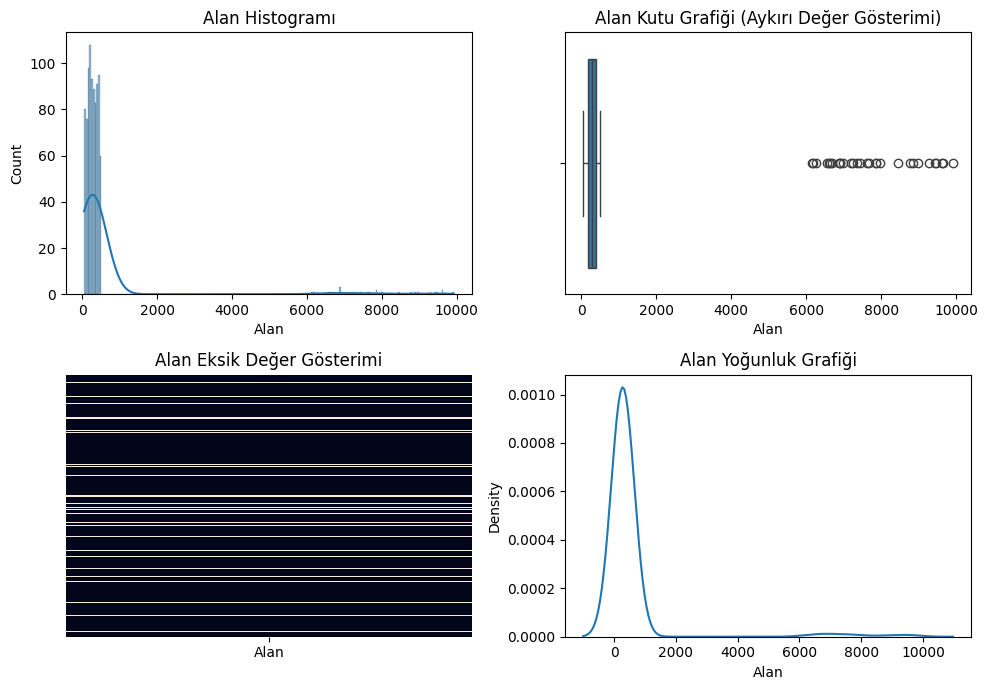

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.histplot(ev_data['Alan'], kde=True)
plt.title('Alan Histogramı')

plt.subplot(2, 2, 2)
sns.boxplot(x=ev_data['Alan'])
plt.title('Alan Kutu Grafiği (Aykırı Değer Gösterimi)')

plt.subplot(2, 2, 3)
sns.heatmap(ev_data[['Alan']].isnull(), cbar=False, yticklabels=False)
plt.title('Alan Eksik Değer Gösterimi')

plt.subplot(2, 2, 4)
sns.kdeplot(ev_data['Alan'])
plt.title('Alan Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


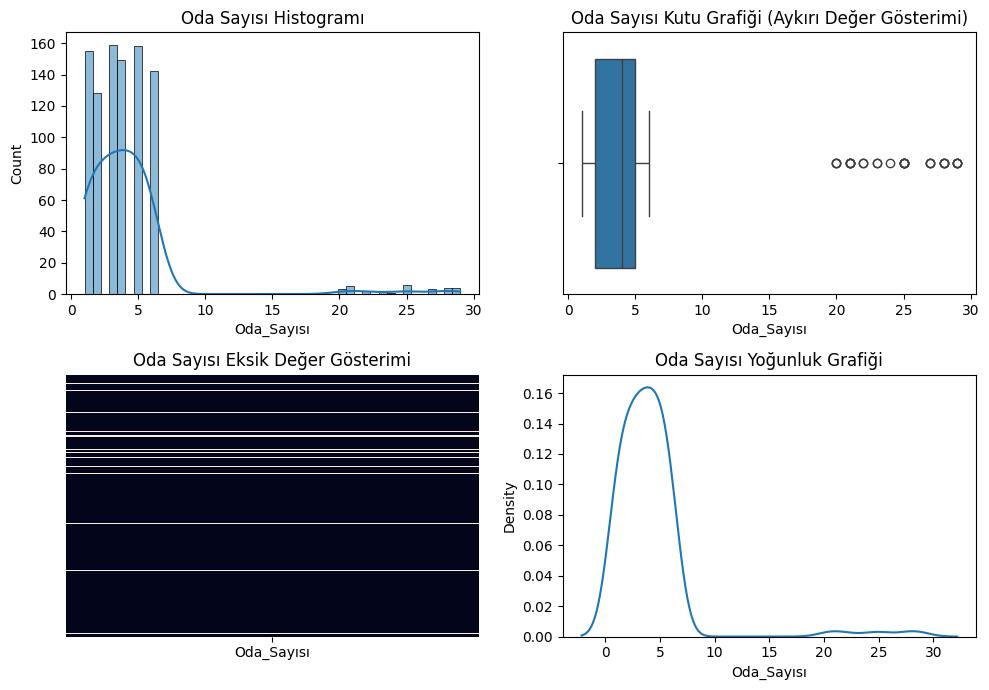

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.histplot(ev_data['Oda_Sayısı'], kde=True)
plt.title('Oda Sayısı Histogramı')

plt.subplot(2, 2, 2)
sns.boxplot(x=ev_data['Oda_Sayısı'])
plt.title('Oda Sayısı Kutu Grafiği (Aykırı Değer Gösterimi)')

plt.subplot(2, 2, 3)
sns.heatmap(ev_data[['Oda_Sayısı']].isnull(), cbar=False, yticklabels=False)
plt.title('Oda Sayısı Eksik Değer Gösterimi')

plt.subplot(2, 2, 4)
sns.kdeplot(ev_data['Oda_Sayısı'])
plt.title('Oda Sayısı Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


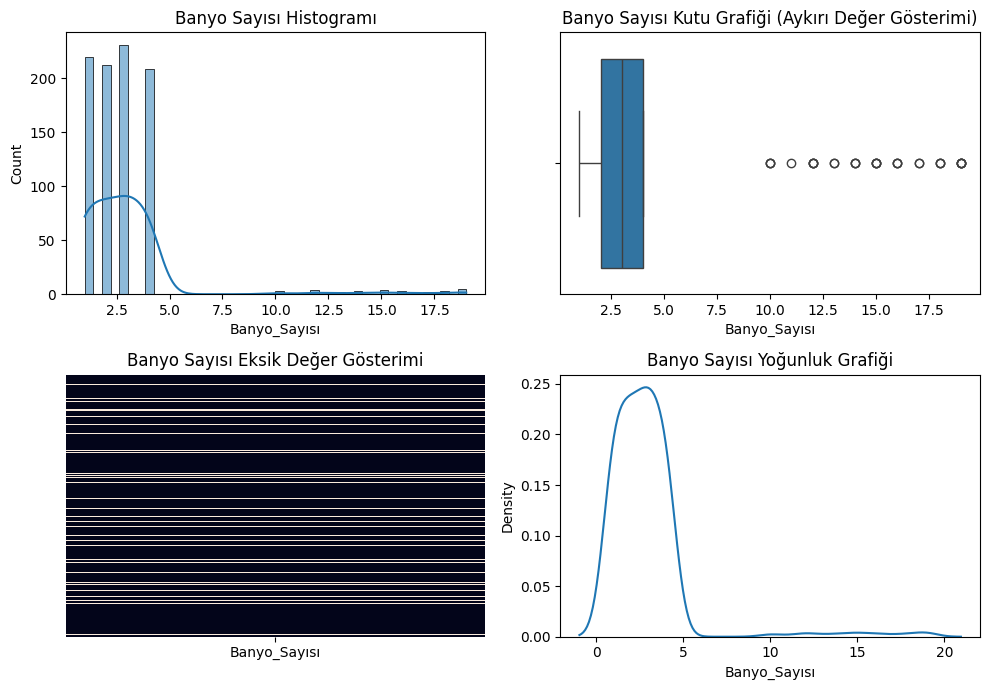

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.histplot(ev_data['Banyo_Sayısı'], kde=True)
plt.title('Banyo Sayısı Histogramı')

plt.subplot(2, 2, 2)
sns.boxplot(x=ev_data['Banyo_Sayısı'])
plt.title('Banyo Sayısı Kutu Grafiği (Aykırı Değer Gösterimi)')

plt.subplot(2, 2, 3)
sns.heatmap(ev_data[['Banyo_Sayısı']].isnull(), cbar=False, yticklabels=False)
plt.title('Banyo Sayısı Eksik Değer Gösterimi')

plt.subplot(2, 2, 4)
sns.kdeplot(ev_data['Banyo_Sayısı'])
plt.title('Banyo Sayısı Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


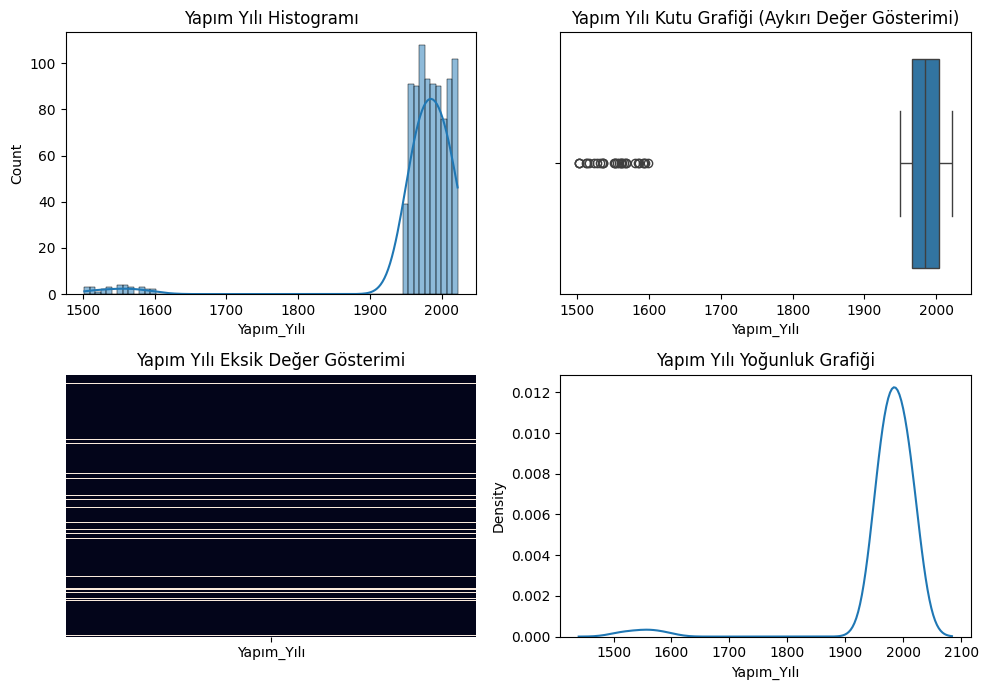

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.histplot(ev_data['Yapım_Yılı'], kde=True)
plt.title('Yapım Yılı Histogramı')

plt.subplot(2, 2, 2)
sns.boxplot(x=ev_data['Yapım_Yılı'])
plt.title('Yapım Yılı Kutu Grafiği (Aykırı Değer Gösterimi)')

plt.subplot(2, 2, 3)
sns.heatmap(ev_data[['Yapım_Yılı']].isnull(), cbar=False, yticklabels=False)
plt.title('Yapım Yılı Eksik Değer Gösterimi')

plt.subplot(2, 2, 4)
sns.kdeplot(ev_data['Yapım_Yılı'])
plt.title('Yapım Yılı Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


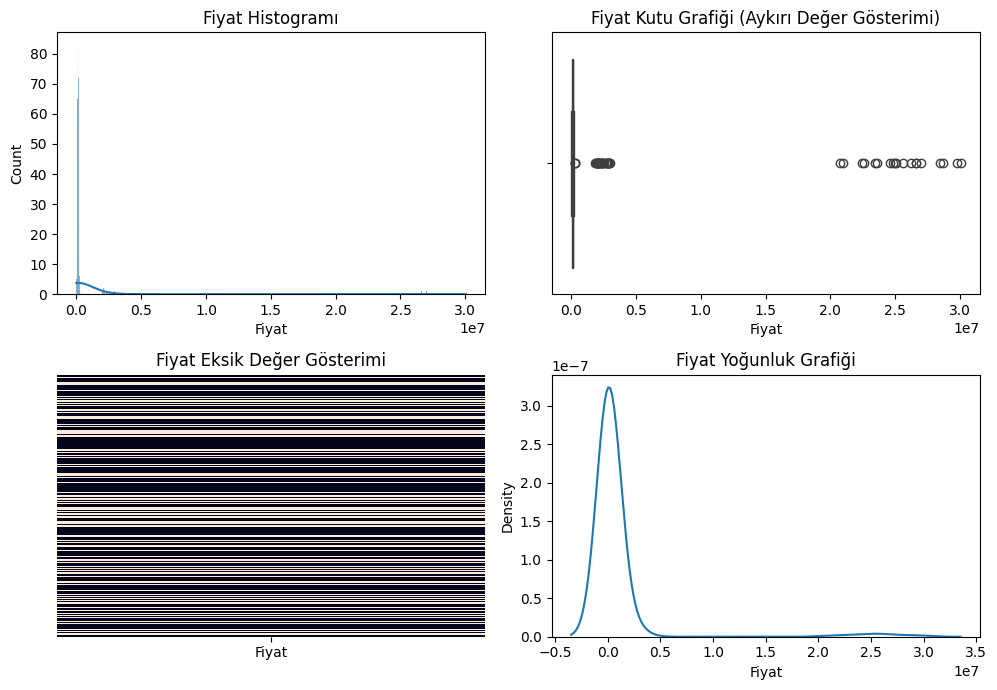

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
sns.histplot(ev_data['Fiyat'], kde=True)
plt.title('Fiyat Histogramı')

plt.subplot(2, 2, 2)
sns.boxplot(x=ev_data['Fiyat'])
plt.title('Fiyat Kutu Grafiği (Aykırı Değer Gösterimi)')

plt.subplot(2, 2, 3)
sns.heatmap(ev_data[['Fiyat']].isnull(), cbar=False, yticklabels=False)
plt.title('Fiyat Eksik Değer Gösterimi')

plt.subplot(2, 2, 4)
sns.kdeplot(ev_data['Fiyat'])
plt.title('Fiyat Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


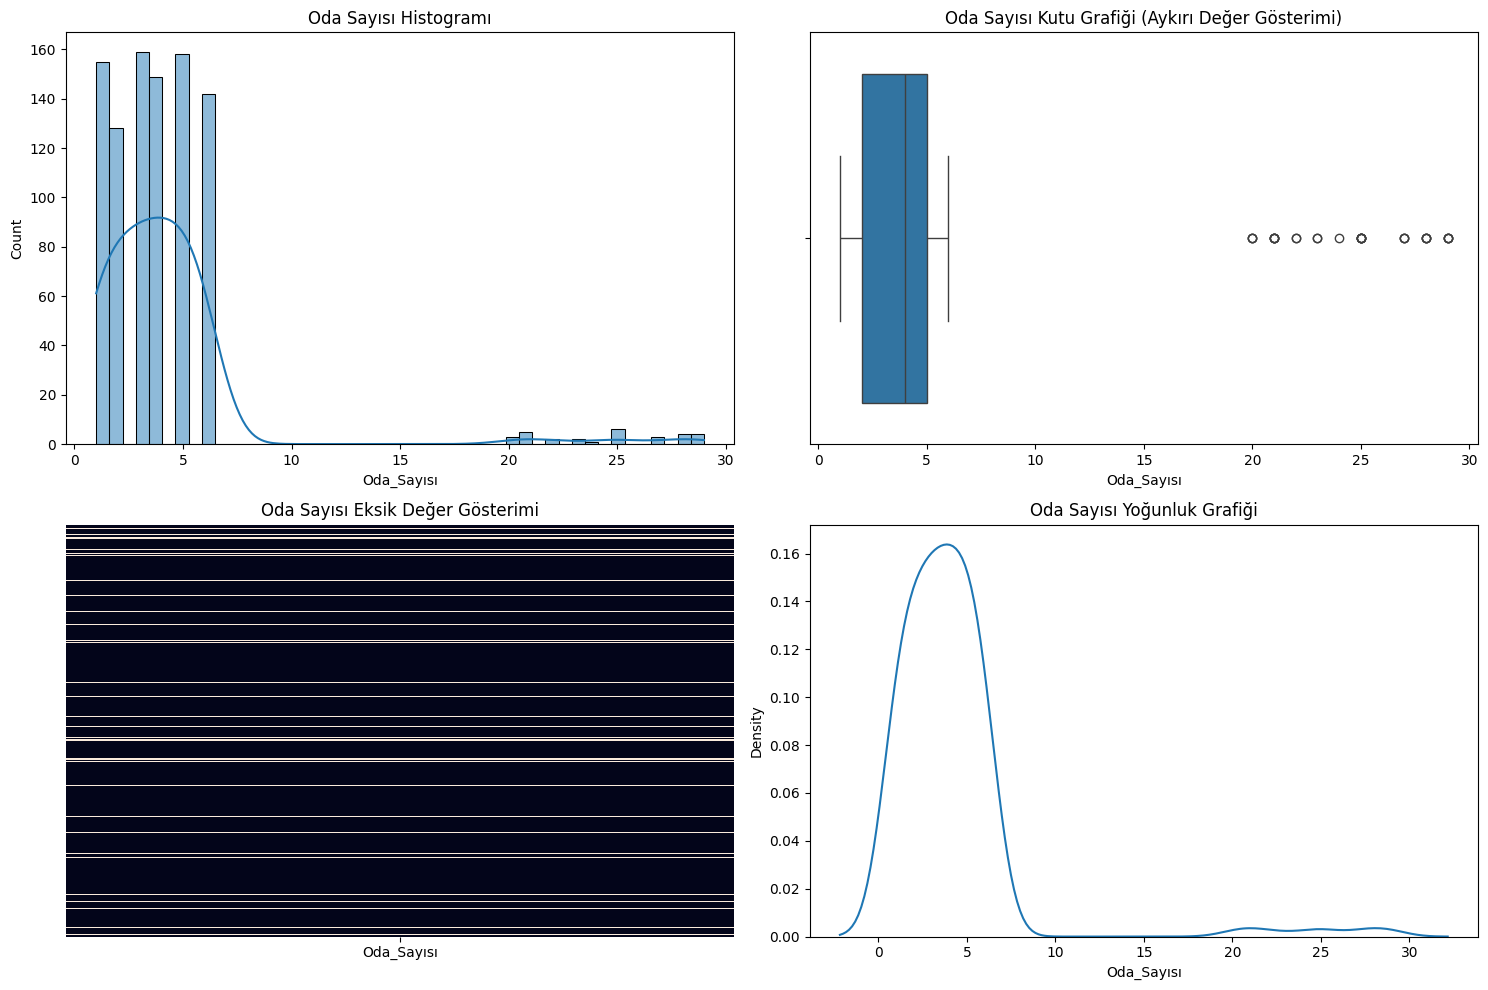

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ev_data['Oda_Sayısı'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Oda Sayısı Histogramı')

sns.boxplot(x=ev_data['Oda_Sayısı'], ax=ax[0, 1])
ax[0, 1].set_title('Oda Sayısı Kutu Grafiği (Aykırı Değer Gösterimi)')

sns.heatmap(ev_data[['Oda_Sayısı']].isnull(), cbar=False, yticklabels=False, ax=ax[1, 0])
ax[1, 0].set_title('Oda Sayısı Eksik Değer Gösterimi')

sns.kdeplot(ev_data['Oda_Sayısı'], ax=ax[1, 1])
ax[1, 1].set_title('Oda Sayısı Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


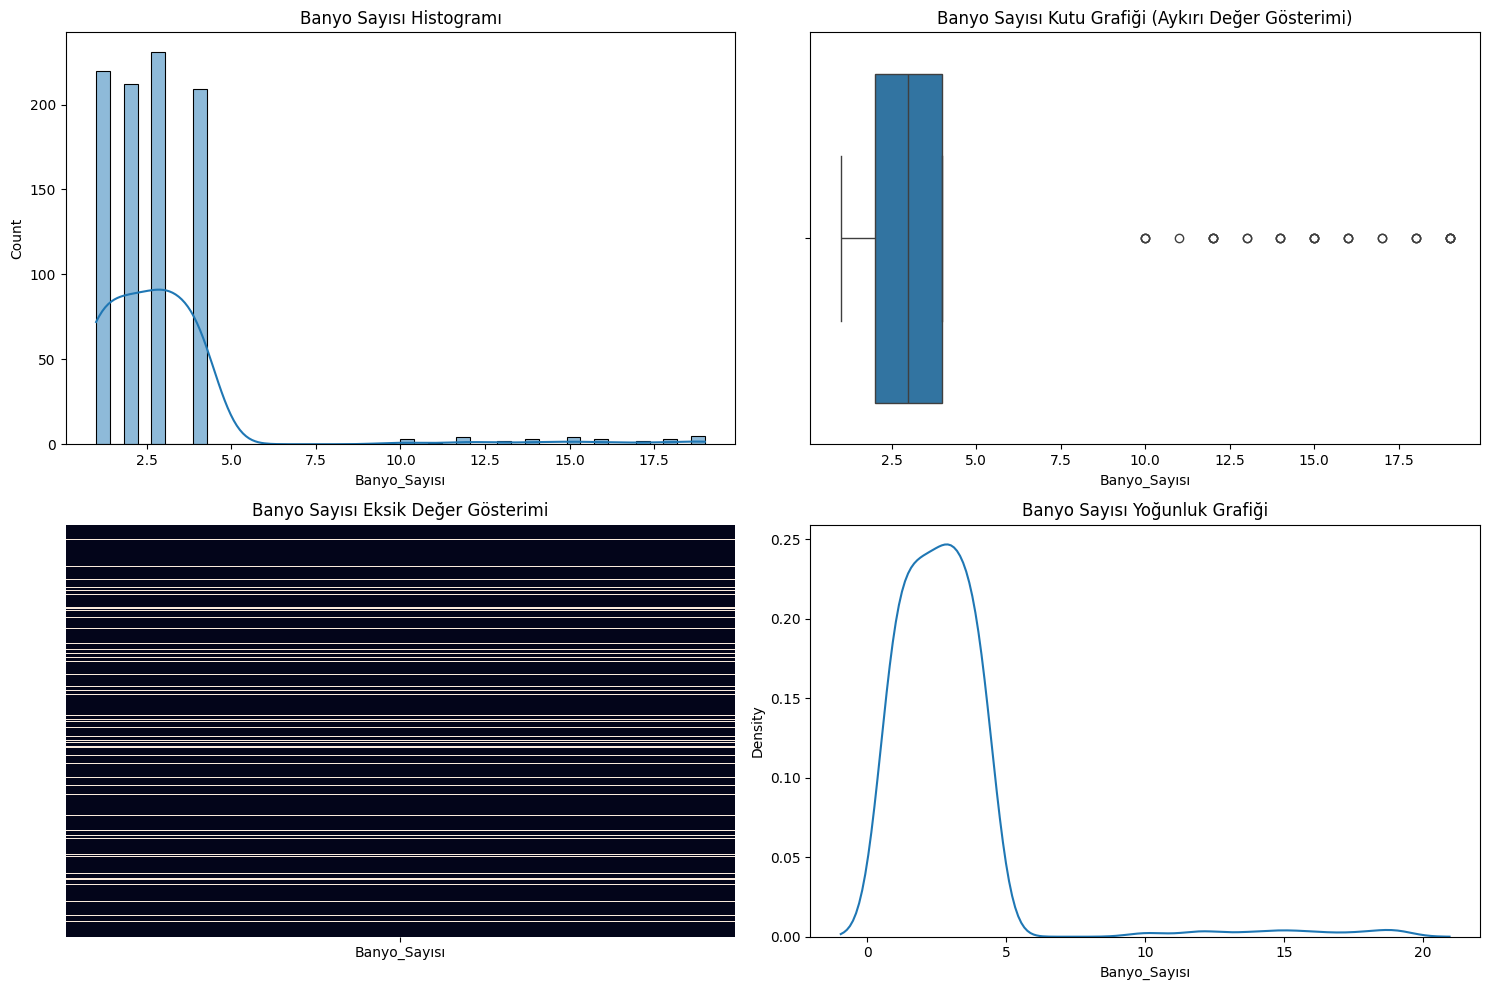

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ev_data['Banyo_Sayısı'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Banyo Sayısı Histogramı')

sns.boxplot(x=ev_data['Banyo_Sayısı'], ax=ax[0, 1])
ax[0, 1].set_title('Banyo Sayısı Kutu Grafiği (Aykırı Değer Gösterimi)')

sns.heatmap(ev_data[['Banyo_Sayısı']].isnull(), cbar=False, yticklabels=False, ax=ax[1, 0])
ax[1, 0].set_title('Banyo Sayısı Eksik Değer Gösterimi')

sns.kdeplot(ev_data['Banyo_Sayısı'], ax=ax[1, 1])
ax[1, 1].set_title('Banyo Sayısı Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


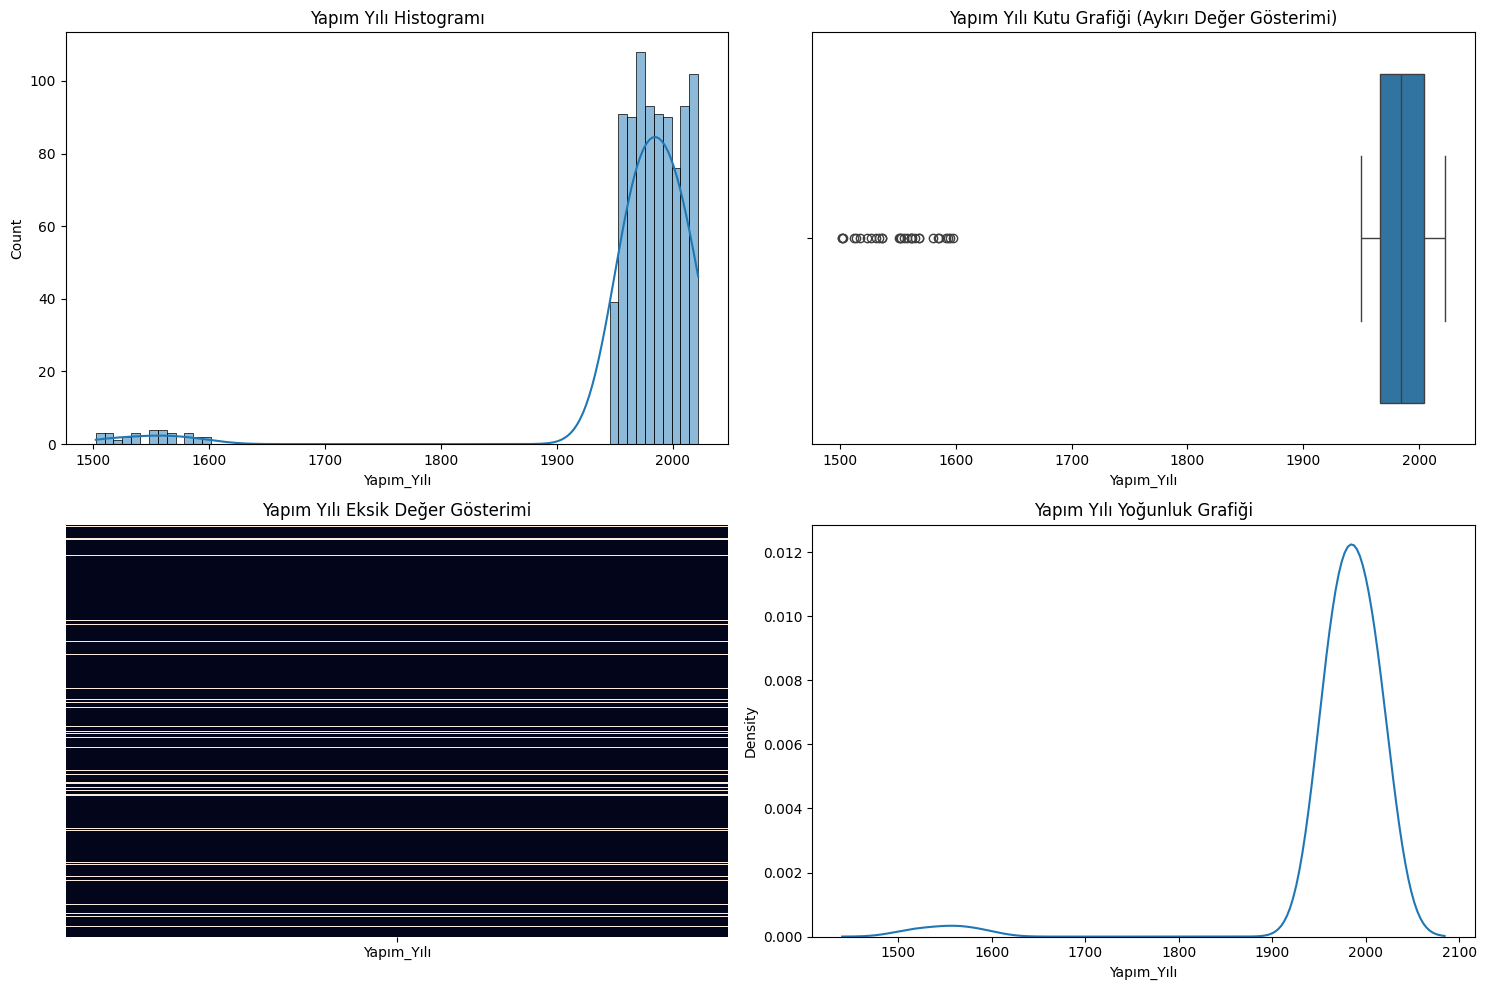

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ev_data['Yapım_Yılı'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Yapım Yılı Histogramı')

sns.boxplot(x=ev_data['Yapım_Yılı'], ax=ax[0, 1])
ax[0, 1].set_title('Yapım Yılı Kutu Grafiği (Aykırı Değer Gösterimi)')

sns.heatmap(ev_data[['Yapım_Yılı']].isnull(), cbar=False, yticklabels=False, ax=ax[1, 0])
ax[1, 0].set_title('Yapım Yılı Eksik Değer Gösterimi')

sns.kdeplot(ev_data['Yapım_Yılı'], ax=ax[1, 1])
ax[1, 1].set_title('Yapım Yılı Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


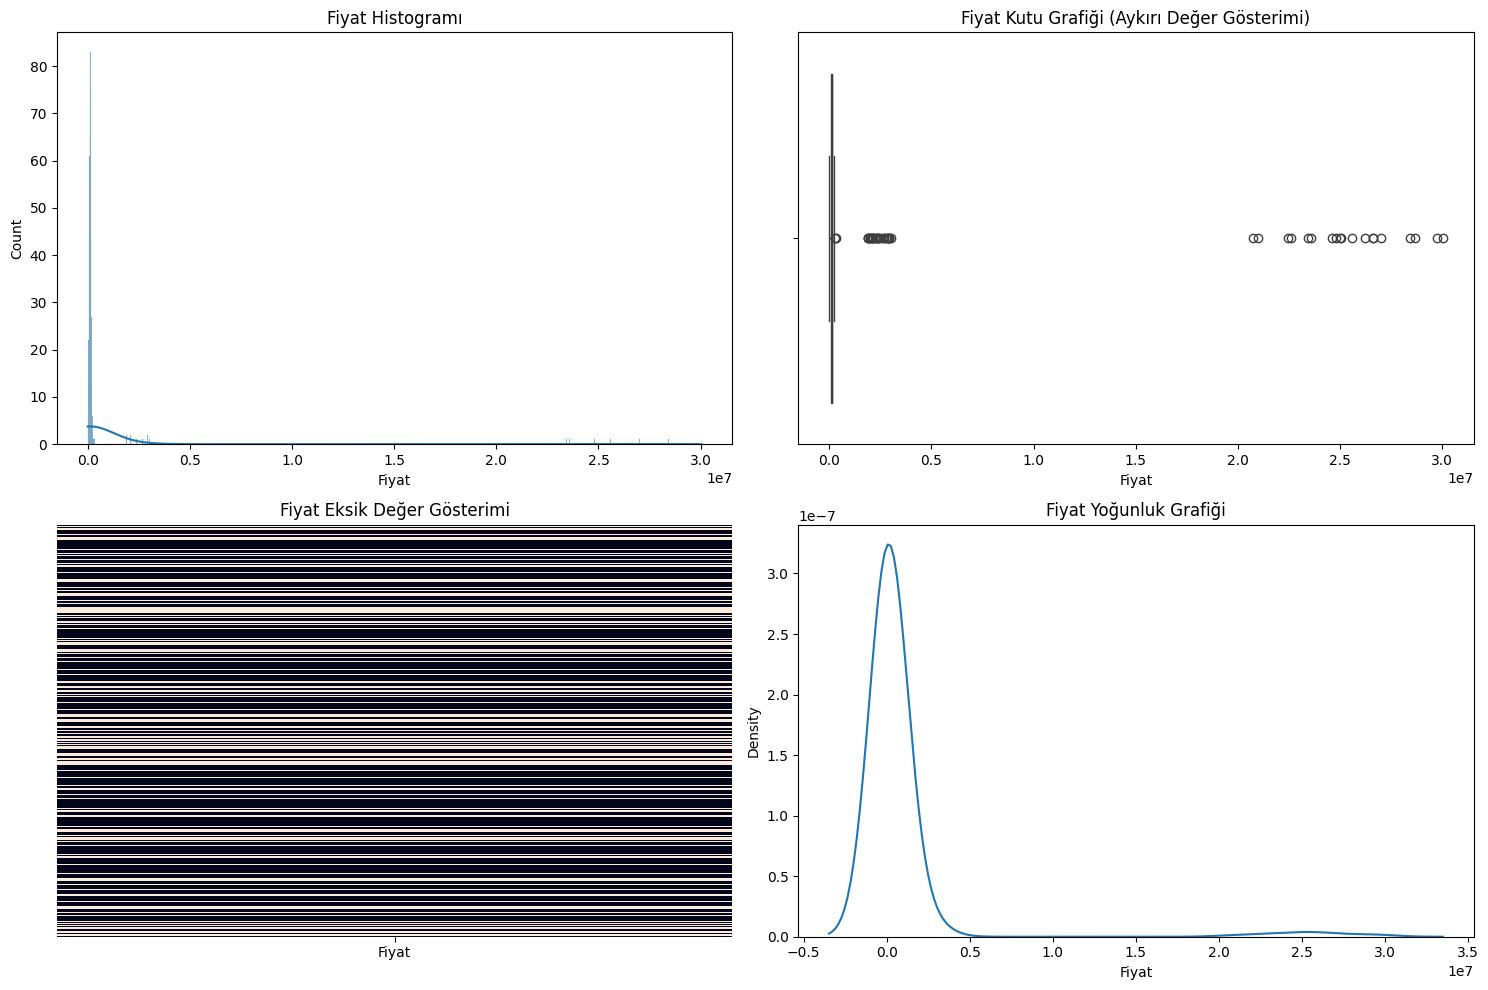

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ev_data['Fiyat'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Fiyat Histogramı')

sns.boxplot(x=ev_data['Fiyat'], ax=ax[0, 1])
ax[0, 1].set_title('Fiyat Kutu Grafiği (Aykırı Değer Gösterimi)')

sns.heatmap(ev_data[['Fiyat']].isnull(), cbar=False, yticklabels=False, ax=ax[1, 0])
ax[1, 0].set_title('Fiyat Eksik Değer Gösterimi')

sns.kdeplot(ev_data['Fiyat'], ax=ax[1, 1])
ax[1, 1].set_title('Fiyat Yoğunluk Grafiği')

plt.tight_layout()
plt.show()


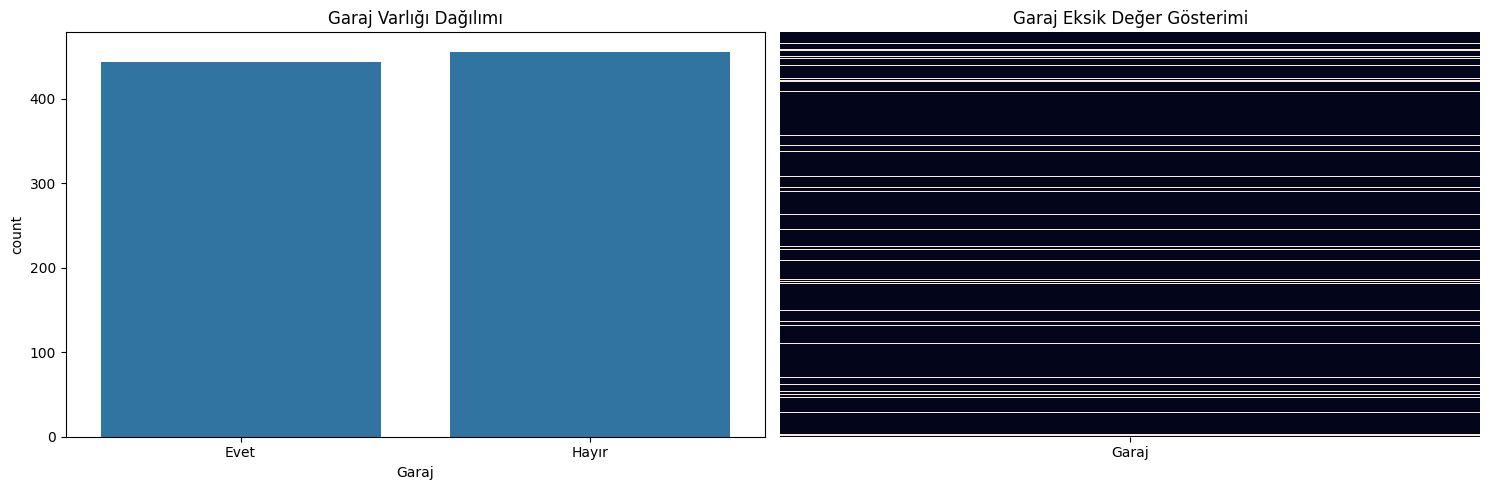

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=ev_data, x='Garaj')
plt.title('Garaj Varlığı Dağılımı')

plt.subplot(1, 2, 2)
sns.heatmap(ev_data[['Garaj']].isnull(), cbar=False, yticklabels=False)
plt.title('Garaj Eksik Değer Gösterimi')

plt.tight_layout()
plt.show()


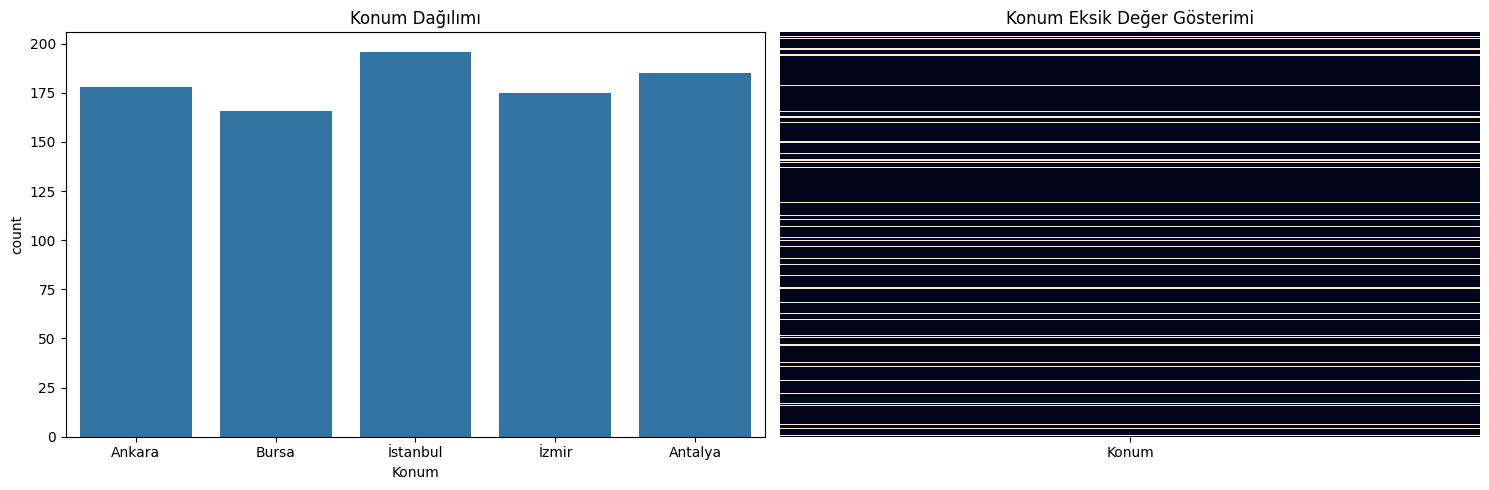

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=ev_data, x='Konum')
plt.title('Konum Dağılımı')

plt.subplot(1, 2, 2)
sns.heatmap(ev_data[['Konum']].isnull(), cbar=False, yticklabels=False)
plt.title('Konum Eksik Değer Gösterimi')

plt.tight_layout()
plt.show()


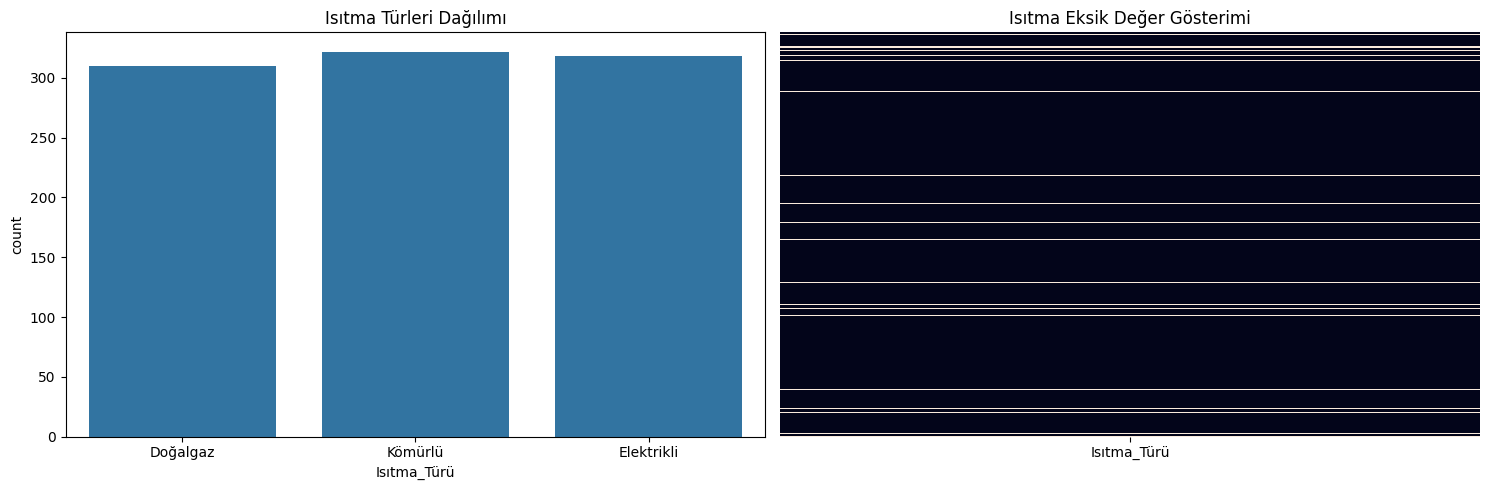

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=ev_data, x='Isıtma_Türü')
plt.title('Isıtma Türleri Dağılımı')

plt.subplot(1, 2, 2)
sns.heatmap(ev_data[['Isıtma_Türü']].isnull(), cbar=False, yticklabels=False)
plt.title('Isıtma Eksik Değer Gösterimi')

plt.tight_layout()
plt.show()


In [18]:
ev_data_2 = ev_data.copy()

In [19]:
medyan_alan = ev_data_2['Alan'].median()
ev_data_2['Alan'].fillna(medyan_alan, inplace=True)

Q1 = ev_data_2['Alan'].quantile(0.25)
Q3 = ev_data_2['Alan'].quantile(0.75)
IQR = Q3 - Q1
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

ev_data_2.loc[ev_data_2['Alan'] < alt_sinir, 'Alan'] = medyan_alan
ev_data_2.loc[ev_data_2['Alan'] > ust_sinir, 'Alan'] = medyan_alan

ev_data_2['Alan'] = np.log1p(ev_data_2['Alan'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ev_data_2['Alan'] = scaler.fit_transform(ev_data_2[['Alan']])

print("Önceki hali:\n: ", ev_data.head())

print("*"*100)

print("işlemeden sonraki hali:\n: ", ev_data_2.head())


<ipython-input-19-a3c9e4acac8a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Alan'].fillna(medyan_alan, inplace=True)


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
işlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  0.481260         6.0           4.0      2015.0   Evet    Ankara   
1  0.987559         2.0           2.0      1995.0   Evet     Bursa   
2  0.901153         1.0           1.0      1979.0  Hayır 

In [20]:
medyan_oda = ev_data_2['Oda_Sayısı'].median()
ev_data_2['Oda_Sayısı'].fillna(medyan_oda, inplace=True)

Q1_oda = ev_data_2['Oda_Sayısı'].quantile(0.25)
Q3_oda = ev_data_2['Oda_Sayısı'].quantile(0.75)
IQR_oda = Q3_oda - Q1_oda
alt_sinir_oda = Q1_oda - 1.5 * IQR_oda
ust_sinir_oda = Q3_oda + 1.5 * IQR_oda

ev_data_2.loc[ev_data_2['Oda_Sayısı'] < alt_sinir_oda, 'Oda_Sayısı'] = medyan_oda
ev_data_2.loc[ev_data_2['Oda_Sayısı'] > ust_sinir_oda, 'Oda_Sayısı'] = medyan_oda

ev_data_2['Oda_Sayısı'] = scaler.fit_transform(ev_data_2[['Oda_Sayısı']])

print("Önceki hali:\n: ", ev_data.head())

print("*"*100)

print("işlemeden sonraki hali:\n: ", ev_data_2.head())


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
işlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  0.481260         1.0           4.0      2015.0   Evet    Ankara   
1  0.987559         0.2           2.0      1995.0   Evet     Bursa   
2  0.901153         0.0           1.0      1979.0  Hayır 

<ipython-input-20-53ea69f00567>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Oda_Sayısı'].fillna(medyan_oda, inplace=True)


In [21]:
medyan_banyo = ev_data_2['Banyo_Sayısı'].median()
ev_data_2['Banyo_Sayısı'].fillna(medyan_banyo, inplace=True)

Q1_banyo = ev_data_2['Banyo_Sayısı'].quantile(0.25)
Q3_banyo = ev_data_2['Banyo_Sayısı'].quantile(0.75)
IQR_banyo = Q3_banyo - Q1_banyo
alt_sinir_banyo = Q1_banyo - 1.5 * IQR_banyo
ust_sinir_banyo = Q3_banyo + 1.5 * IQR_banyo

ev_data_2.loc[ev_data_2['Banyo_Sayısı'] < alt_sinir_banyo, 'Banyo_Sayısı'] = medyan_banyo
ev_data_2.loc[ev_data_2['Banyo_Sayısı'] > ust_sinir_banyo, 'Banyo_Sayısı'] = medyan_banyo

ev_data_2['Banyo_Sayısı'] = scaler.fit_transform(ev_data_2[['Banyo_Sayısı']])

print("Önceki hali:\n: ", ev_data.head())

print("*"*100)

print("İşlemeden sonraki hali:\n: ", ev_data_2.head())


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
İşlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  0.481260         1.0      1.000000      2015.0   Evet    Ankara   
1  0.987559         0.2      0.333333      1995.0   Evet     Bursa   
2  0.901153         0.0      0.000000      1979.0  Hayır 

<ipython-input-21-87b130db9d78>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Banyo_Sayısı'].fillna(medyan_banyo, inplace=True)


In [22]:
medyan_yapim_yili = ev_data_2['Yapım_Yılı'].median()
ev_data_2['Yapım_Yılı'].fillna(medyan_yapim_yili, inplace=True)

Q1_yapim = ev_data_2['Yapım_Yılı'].quantile(0.25)
Q3_yapim = ev_data_2['Yapım_Yılı'].quantile(0.75)
IQR_yapim = Q3_yapim - Q1_yapim
alt_sinir_yapim = Q1_yapim - 1.5 * IQR_yapim
ust_sinir_yapim = Q3_yapim + 1.5 * IQR_yapim

ev_data_2.loc[ev_data_2['Yapım_Yılı'] < alt_sinir_yapim, 'Yapım_Yılı'] = medyan_yapim_yili
ev_data_2.loc[ev_data_2['Yapım_Yılı'] > ust_sinir_yapim, 'Yapım_Yılı'] = medyan_yapim_yili

current_year = 2024
ev_data_2['Ev_Yaşı'] = current_year - ev_data_2['Yapım_Yılı']

scaler = MinMaxScaler()
ev_data_2[['Yapım_Yılı', 'Ev_Yaşı']] = scaler.fit_transform(ev_data_2[['Yapım_Yılı', 'Ev_Yaşı']])

print("Önceki hali:\n: ", ev_data.head())
print("*"*100)
print("İşlemeden sonraki hali:\n: ", ev_data_2.head())


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
İşlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  0.481260         1.0      1.000000    0.902778   Evet    Ankara   
1  0.987559         0.2      0.333333    0.625000   Evet     Bursa   
2  0.901153         0.0      0.000000    0.402778  Hayır 

<ipython-input-22-7b5ba1ca70e3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Yapım_Yılı'].fillna(medyan_yapim_yili, inplace=True)


In [23]:
medyan_fiyat = ev_data_2['Fiyat'].median()
ev_data_2['Fiyat'].fillna(medyan_fiyat, inplace=True)

Q1_fiyat = ev_data_2['Fiyat'].quantile(0.25)
Q3_fiyat = ev_data_2['Fiyat'].quantile(0.75)
IQR_fiyat = Q3_fiyat - Q1_fiyat
alt_sinir_fiyat = Q1_fiyat - 1.5 * IQR_fiyat
ust_sinir_fiyat = Q3_fiyat + 1.5 * IQR_fiyat

ev_data_2.loc[ev_data_2['Fiyat'] < alt_sinir_fiyat, 'Fiyat'] = medyan_fiyat
ev_data_2.loc[ev_data_2['Fiyat'] > ust_sinir_fiyat, 'Fiyat'] = medyan_fiyat

ev_data_2['Fiyat'] = np.log1p(ev_data_2['Fiyat'])

scaler = MinMaxScaler()
ev_data_2['Fiyat'] = scaler.fit_transform(ev_data_2[['Fiyat']])

print("Önceki hali:\n: ", ev_data.head())
print("*"*100)
print("İşlemeden sonraki hali:\n: ", ev_data_2.head())



<ipython-input-23-b11b95cc6cad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Fiyat'].fillna(medyan_fiyat, inplace=True)


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
İşlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum     Fiyat  \
0  0.481260         1.0      1.000000    0.902778   Evet    Ankara  0.602066   
1  0.987559         0.2      0.333333    0.625000   Evet     Bursa  0.849353   
2  0.901153         0.0    

In [24]:
mod_garaj = ev_data_2['Garaj'].mode()[0]
ev_data_2['Garaj'].fillna(mod_garaj, inplace=True)

ev_data_2['Garaj'] = ev_data_2['Garaj'].replace({'Evet': 1, 'Hayır': 0})

print("Önceki hali:\n: ", ev_data.head())
print("*"*100)
print("İşlemeden sonraki hali:\n: ", ev_data_2.head())


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
İşlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum     Fiyat  \
0  0.481260         1.0      1.000000    0.902778      1    Ankara  0.602066   
1  0.987559         0.2      0.333333    0.625000      1     Bursa  0.849353   
2  0.901153         0.0    

<ipython-input-24-bb5fc94b5c12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Garaj'].fillna(mod_garaj, inplace=True)
<ipython-input-24-bb5fc94b5c12>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ev_data_2['Garaj'] = ev_data_2['Garaj'].replace({'Evet': 1, 'Hayır': 0})


In [25]:
mod_konum = ev_data_2['Konum'].mode()[0]
ev_data_2['Konum'].fillna(mod_konum, inplace=True)

ev_data_2 = pd.get_dummies(ev_data_2, columns=['Konum'], dtype=int)

print("Önceki hali:\n: ", ev_data.head())
print("*"*100)
print("İşlemeden sonraki hali:\n: ", ev_data_2.head())


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
İşlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Fiyat  \
0  0.481260         1.0      1.000000    0.902778      1  0.602066   
1  0.987559         0.2      0.333333    0.625000      1  0.849353   
2  0.901153         0.0      0.000000    0.402778      0 

<ipython-input-25-eddf88d0aa43>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Konum'].fillna(mod_konum, inplace=True)


In [26]:
mod_isitma = ev_data_2['Isıtma_Türü'].mode()[0]
ev_data_2['Isıtma_Türü'].fillna(mod_isitma, inplace=True)

ev_data_2 = pd.get_dummies(ev_data_2, columns=['Isıtma_Türü'], dtype=int)

ev_data_2.head()

print("Önceki hali:\n: ", ev_data.head())
print("*"*100)
print("İşlemeden sonraki hali:\n: ", ev_data_2.head())


Önceki hali:
:      Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Konum  \
0  152.0         6.0           4.0      2015.0   Evet    Ankara   
1  485.0         2.0           2.0      1995.0   Evet     Bursa   
2  398.0         1.0           1.0      1979.0  Hayır  İstanbul   
3  320.0         5.0           2.0      2018.0  Hayır     İzmir   
4  156.0         6.0           4.0         NaN  Hayır   Antalya   

           Fiyat Isıtma_Türü  
0  108907.525445    Doğalgaz  
1  156339.089688    Doğalgaz  
2  152771.664713    Doğalgaz  
3  136828.255127    Doğalgaz  
4            NaN    Doğalgaz  
****************************************************************************************************
İşlemeden sonraki hali:
:         Alan  Oda_Sayısı  Banyo_Sayısı  Yapım_Yılı  Garaj     Fiyat   Ev_Yaşı  \
0  0.481260         1.0      1.000000    0.902778      1  0.602066  0.097222   
1  0.987559         0.2      0.333333    0.625000      1  0.849353  0.375000   
2  0.901153         0.0    

<ipython-input-26-63794e2006d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data_2['Isıtma_Türü'].fillna(mod_isitma, inplace=True)


In [27]:
display(ev_data.head())

display(ev_data_2.head())

,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Garaj,Konum,Fiyat,Isıtma_Türü
0,152.0,6.0,4.0,2015.0,Evet,Ankara,108907.525445,Doğalgaz
1,485.0,2.0,2.0,1995.0,Evet,Bursa,156339.089688,Doğalgaz
2,398.0,1.0,1.0,1979.0,Hayır,İstanbul,152771.664713,Doğalgaz
3,320.0,5.0,2.0,2018.0,Hayır,İzmir,136828.255127,Doğalgaz
4,156.0,6.0,4.0,NaN,Hayır,Antalya,NaN,Doğalgaz


,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Garaj,Fiyat,Ev_Yaşı,Konum_Ankara,Konum_Antalya,Konum_Bursa,Konum_İstanbul,Konum_İzmir,Isıtma_Türü_Doğalgaz,Isıtma_Türü_Elektrikli,Isıtma_Türü_Kömürlü
0,0.481260,1.0,1.000000,0.902778,1,0.602066,0.097222,1,0,0,0,0,1,0,0
1,0.987559,0.2,0.333333,0.625000,1,0.849353,0.375000,0,0,1,0,0,1,0,0
2,0.901153,0.0,0.000000,0.402778,0,0.833564,0.597222,0,0,0,1,0,1,0,0
3,0.805865,0.8,0.333333,0.944444,0,0.758175,0.055556,0,0,0,0,1,1,0,0
4,0.492566,1.0,1.000000,0.472222,0,0.665681,0.527778,0,1,0,0,0,1,0,0


In [28]:
display(ev_data.describe())


display(ev_data_2.describe())

,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Fiyat
count,903.000000,921.000000,902.000000,903.000000,6.680000e+02
mean,525.437431,4.195440,2.905765,1971.531561,9.218486e+05
std,1368.021756,4.141101,2.541769,80.922692,4.235306e+06
min,50.000000,1.000000,1.000000,1502.000000,-8.706056e+03
25%,173.500000,2.000000,2.000000,1966.500000,7.961537e+04
50%,279.000000,4.000000,3.000000,1984.000000,1.195224e+05
75%,398.000000,5.000000,4.000000,2004.000000,1.555807e+05
max,9919.000000,29.000000,19.000000,2022.000000,3.004170e+07


,Alan,Oda_Sayısı,Banyo_Sayısı,Yapım_Yılı,Garaj,Fiyat,Ev_Yaşı,Konum_Ankara,Konum_Antalya,Konum_Bursa,Konum_İstanbul,Konum_İzmir,Isıtma_Türü_Doğalgaz,Isıtma_Türü_Elektrikli,Isıtma_Türü_Kömürlü
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.688945,0.512400,0.519000,0.496403,0.444000,0.632668,0.503597,0.178000,0.185000,0.166000,0.296000,0.175000,0.310000,0.318000,0.37200
std,0.235103,0.322661,0.350532,0.272700,0.497103,0.190338,0.272700,0.382704,0.388492,0.372267,0.456719,0.380157,0.462725,0.465932,0.48358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.566817,0.200000,0.333333,0.291667,0.000000,0.614841,0.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.746004,0.600000,0.666667,0.472222,0.000000,0.665681,0.527778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.871928,0.800000,0.666667,0.722222,1.000000,0.691522,0.708333,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


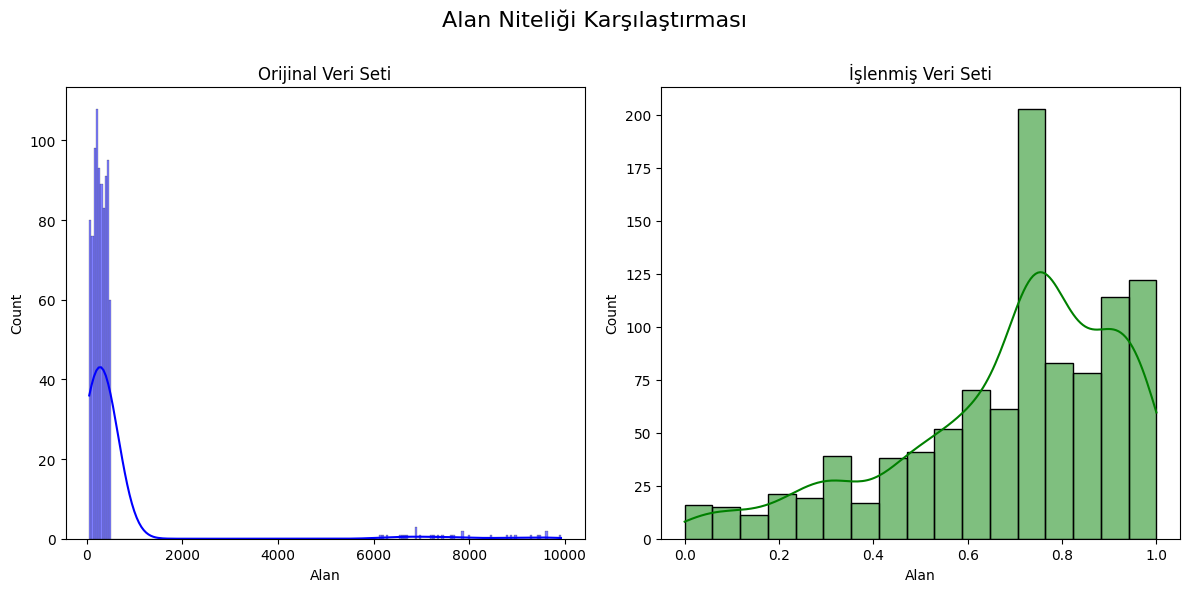

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ev_data['Alan'], kde=True, color='blue')
plt.title('Orijinal Veri Seti')

plt.subplot(1, 2, 2)
sns.histplot(ev_data_2['Alan'], kde=True, color='green')
plt.title('İşlenmiş Veri Seti')

plt.suptitle('Alan Niteliği Karşılaştırması', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


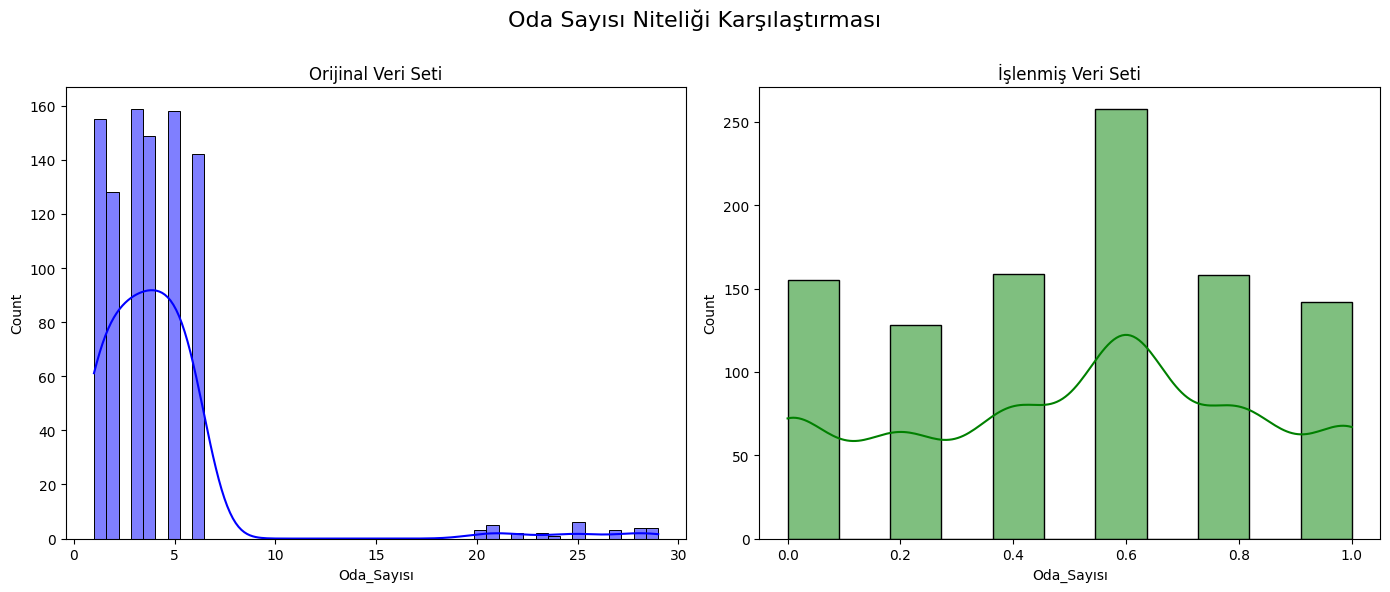

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(ev_data['Oda_Sayısı'], kde=True, color='blue')
plt.title('Orijinal Veri Seti')

plt.subplot(1, 2, 2)
sns.histplot(ev_data_2['Oda_Sayısı'], kde=True, color='green')
plt.title('İşlenmiş Veri Seti')

plt.suptitle('Oda Sayısı Niteliği Karşılaştırması', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


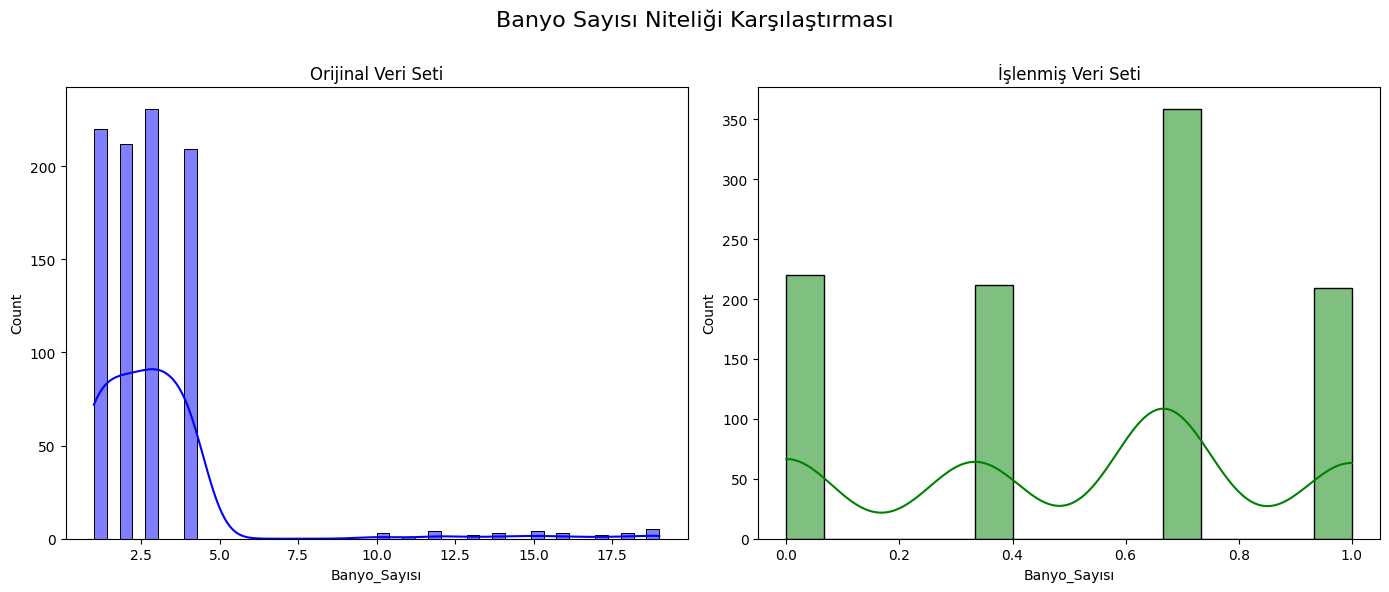

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(ev_data['Banyo_Sayısı'], kde=True, color='blue')
plt.title('Orijinal Veri Seti')

plt.subplot(1, 2, 2)
sns.histplot(ev_data_2['Banyo_Sayısı'], kde=True, color='green')
plt.title('İşlenmiş Veri Seti')

plt.suptitle('Banyo Sayısı Niteliği Karşılaştırması', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


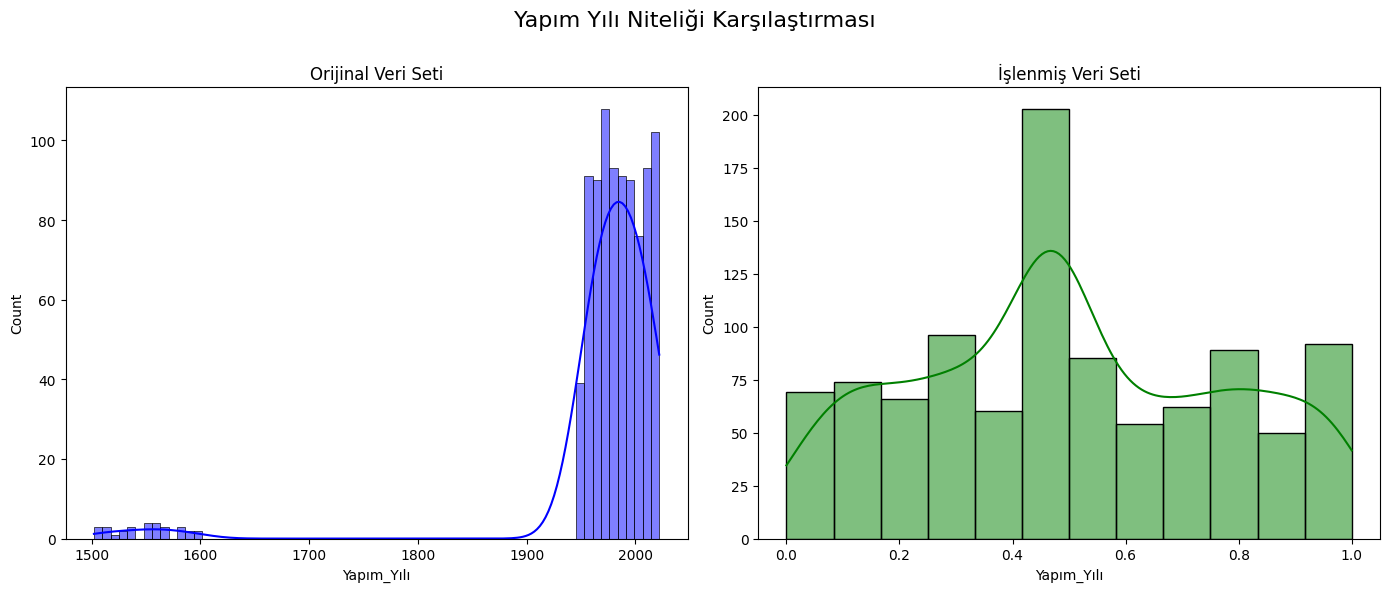

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(ev_data['Yapım_Yılı'], kde=True, color='blue')
plt.title('Orijinal Veri Seti')

plt.subplot(1, 2, 2)
sns.histplot(ev_data_2['Yapım_Yılı'], kde=True, color='green')
plt.title('İşlenmiş Veri Seti')

plt.suptitle('Yapım Yılı Niteliği Karşılaştırması', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


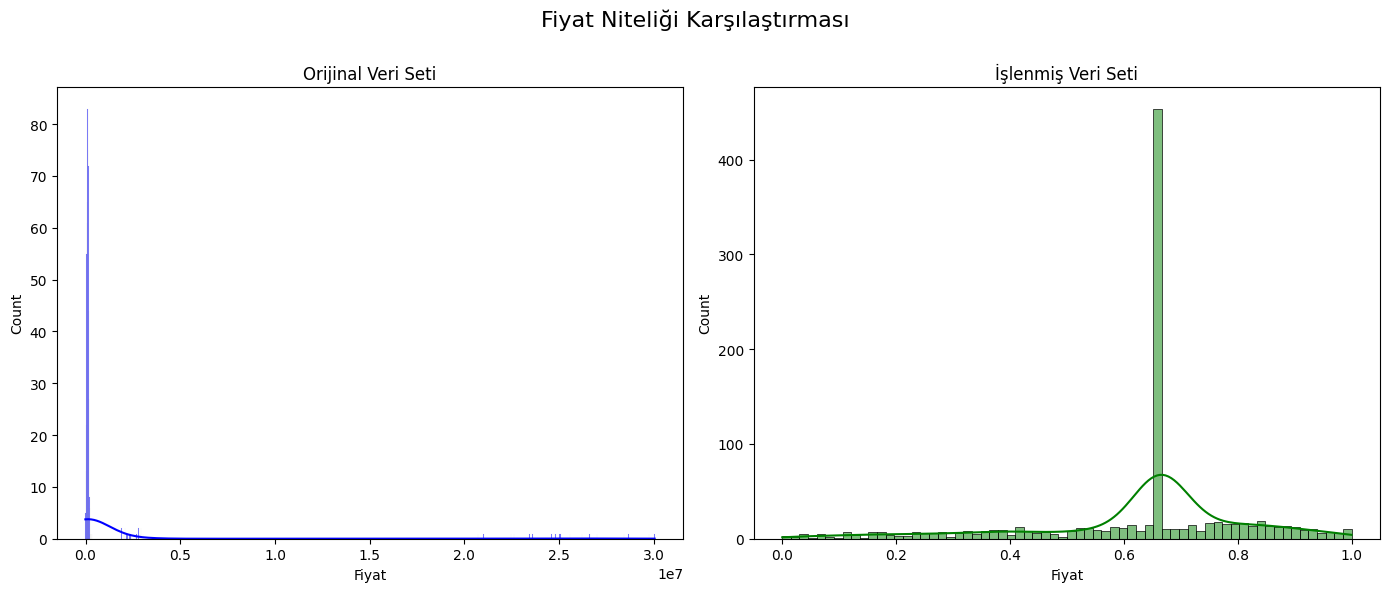

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Fiyat Niteliği Karşılaştırması', fontsize=16)

sns.histplot(ev_data['Fiyat'], ax=axs[0], kde=True, color='blue')
axs[0].set_title('Orijinal Veri Seti')

sns.histplot(ev_data_2['Fiyat'], ax=axs[1], kde=True, color='green')
axs[1].set_title('İşlenmiş Veri Seti')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


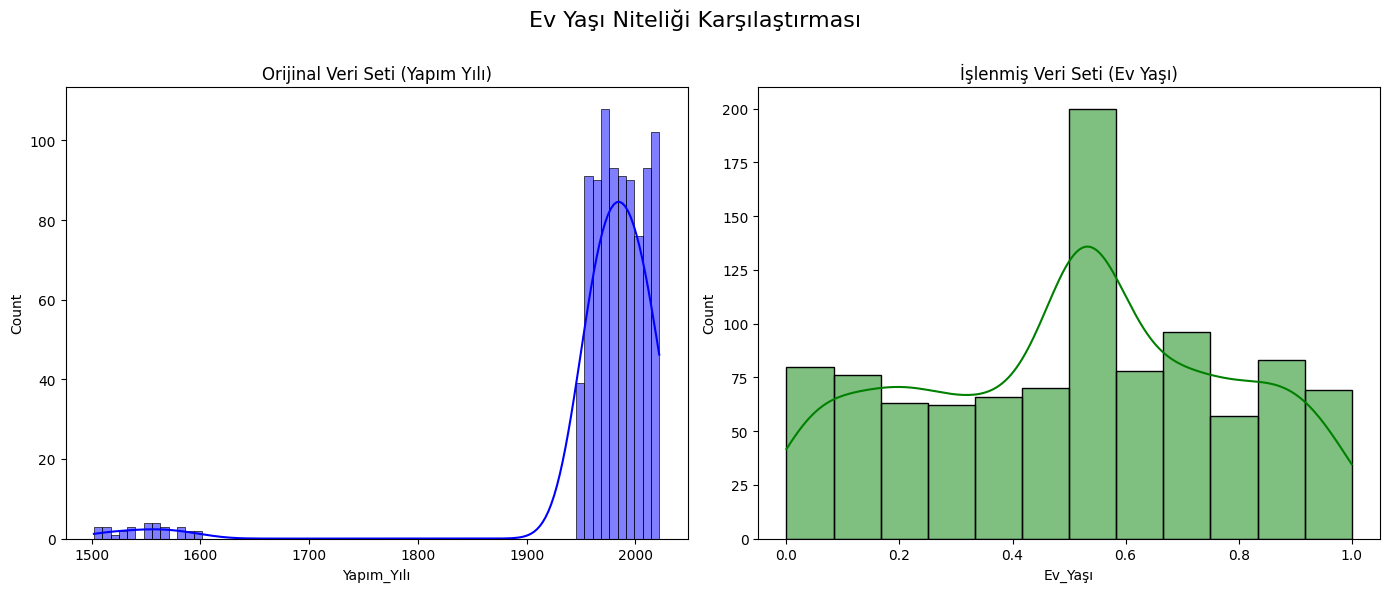

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Ev Yaşı Niteliği Karşılaştırması', fontsize=16)

sns.histplot(ev_data['Yapım_Yılı'], ax=axs[0], kde=True, color='blue')
axs[0].set_title('Orijinal Veri Seti (Yapım Yılı)')

sns.histplot(ev_data_2['Ev_Yaşı'], ax=axs[1], kde=True, color='green')
axs[1].set_title('İşlenmiş Veri Seti (Ev Yaşı)')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


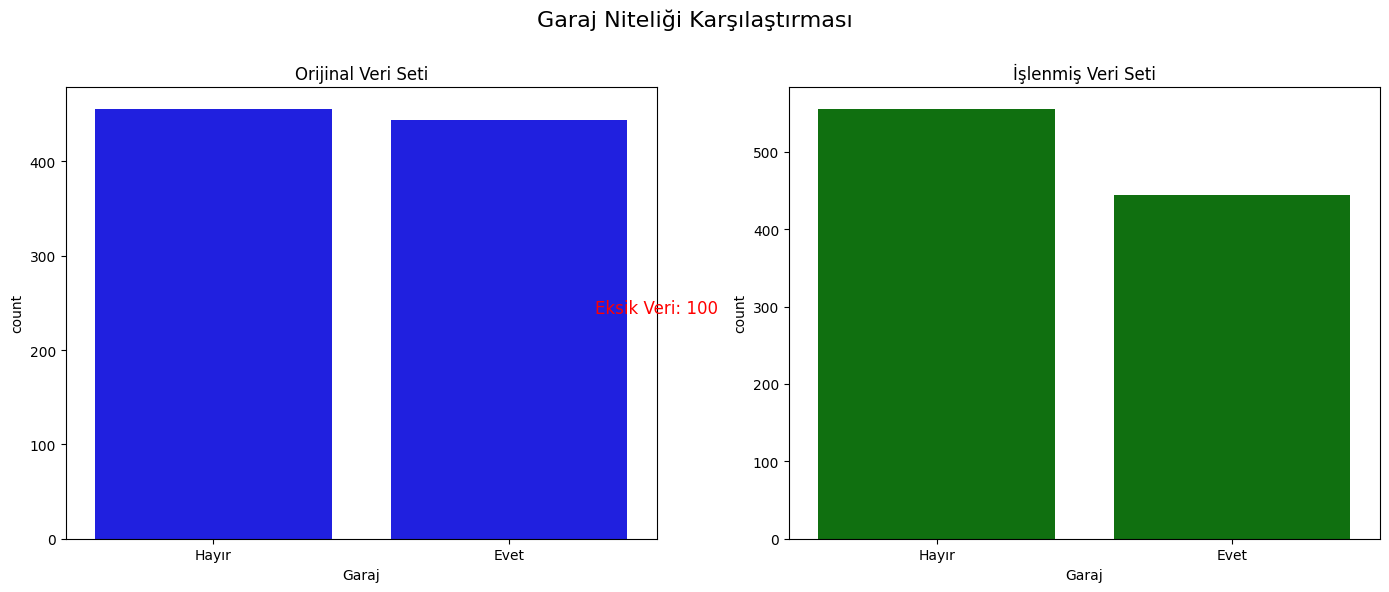

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=ev_data, x='Garaj', color='blue', order=['Hayır', 'Evet'])
plt.title('Orijinal Veri Seti')
num_missing_garaj = ev_data['Garaj'].isnull().sum()
plt.annotate(f'Eksik Veri: {num_missing_garaj}', xy=(1, 0.5), xycoords='axes fraction', fontsize=12, color='red', ha='center')

plt.subplot(1, 2, 2)
sns.countplot(data=ev_data_2, x='Garaj', color='green', order=[0, 1])
plt.title('İşlenmiş Veri Seti')
plt.xticks(ticks=[0, 1], labels=['Hayır', 'Evet'])

plt.suptitle('Garaj Niteliği Karşılaştırması', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()



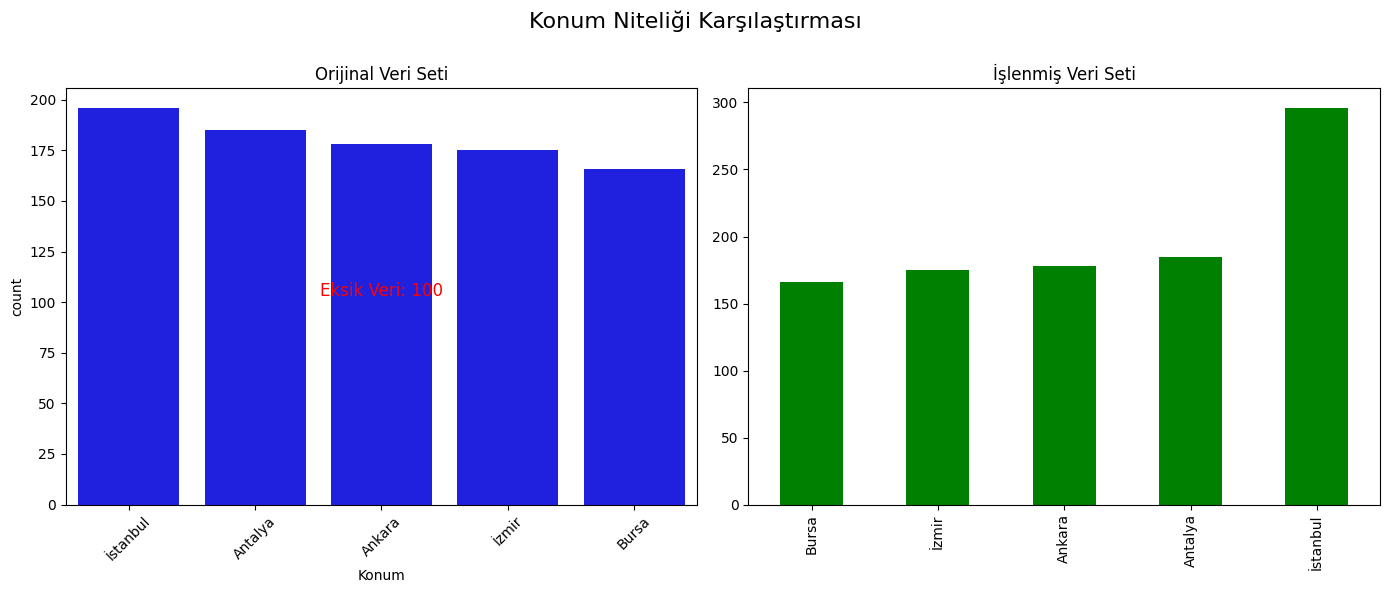

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Konum Niteliği Karşılaştırması', fontsize=16)

sns.countplot(data=ev_data, x='Konum', ax=axs[0], color='blue', order=ev_data['Konum'].value_counts().index)
axs[0].set_title('Orijinal Veri Seti')
axs[0].tick_params(axis='x', rotation=45)

num_missing_konum = ev_data['Konum'].isnull().sum()
axs[0].annotate(f'Eksik Veri: {num_missing_konum}', xy=(0.5,0.5), xycoords='axes fraction', fontsize=12, color='red', ha='center')

konum_cols = [col for col in ev_data_2.columns if 'Konum' in col]
konum_sums = ev_data_2[konum_cols].sum()
konum_sums.index = [col.split('_')[1] for col in konum_sums.index]
konum_sums.sort_values().plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('İşlenmiş Veri Seti')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
